<center>
<img src="../../img/ml_theme.png">
# Дополнительное профессиональное <br> образование НИУ ВШЭ
#### Программа "Машинное обучение и майнинг данных"
<img src="../../img/faculty_logo.jpg" height="240" width="240">
## Автор материала: преподаватель Факультета Компьютерных Наук НИУ ВШЭ Кашницкий Юрий
</center>
Материал распространяется на условиях лицензии <a href="https://opensource.org/licenses/MS-RL">Ms-RL</a>. Можно использовать в любых целях, кроме коммерческих, но с обязательным упоминанием автора материала.

# Занятие 1. Введение в машинное обучение
## Часть 1. Обзор библиотеки Scikit-learn

Приложения машинного обучения: анализ естественного языка, компьютерное зрение, реклама, робототехника, биоинформатика, физика высоких энергий, кредитный скоринг и др. 

<center><img src="../../img/motivation.png" width="100%" /></center>

In [1]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
%pylab inline
import numpy as np
np.set_printoptions(precision=3)
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris, make_circles
from sklearn.svm import SVC, LinearSVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.cluster import SpectralClustering
from sklearn.cluster import KMeans
import sys
if sys.version_info.major == 2:
    from urllib import urlopen
elif sys.version_info.major == 3:
    from urllib.request import urlopen

Populating the interactive namespace from numpy and matplotlib


C:\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:64: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  if 'order' in inspect.getargspec(np.copy)[0]:


<center> 
<img src="../../img/scikit-learn-logo.png" style="max-width: 120px; display: inline" />
<img src="../../img/numpy-logo.png" style="max-width: 120px; display: inline" />
<img src="../../img/scipy-logo.png" style="max-width: 120px; display: inline" />
<img src="../../img/ipython-logo.jpg" style="max-width: 120px; display: inline" />
<img src="../../img/matplotlib-logo.png" style="max-width: 120px; display: inline"/>
<img src="../../img/pandas-logo.png" style="max-width: 120px; display: inline" />
</center>

Библиотека **Scikit-Learn**
 - написана на языке Python
 - включает множество классических алгоритмов машинного обучения
 - Отличная <a href="http://scikit-learn.org/dev/documentation.html">документация</a> и <a href="http://scikit-learn.org/dev/auto_examples/index.html">примеры</a>
 - разработана с помощью GitHub   

- в объединении с библиотеками NumPy, SciPy, ipython, matplotlib и pandas - образует мощное средство анализа данных и машинного обучения

## Алгоритмы

__Обучение с учителем:__

* Линейные модели (Ridge, Lasso, Elastic Net, ...)
* Ансамбли (случайный лес, бэггинг, градиентный бустинг, ...)
* Машина опрных векторов (SVM)
* k ближайших соседей (kNN)

<img src="../../img/classifiers.png" width="90%" />
<center><a href="http://scikit-learn.org/dev/auto_examples/classification/plot_classifier_comparison.html">Сравнение некоторых классификаторов Scikit-Learn</a></center>


__Обучение без учителя:__

* Кластеризация (KMeans, иерархическая, ...)
* Матричная факторизация (PCA, ICA, ...)
* Плотностные методы
* Обнаружение выбросов и аномалий в данных

__Выбор и оценка модели:__

* Скользящий контроль (Cross-validation)
* Поиск в сетке параметров (Grid-search)
* Множество метрик
* <a href="http://scikit-learn.org/stable/modules/classes.html">и другие</a>

Компактная <a href="http://peekaboo-vision.blogspot.de/2013/01/machine-learning-cheat-sheet-for-scikit.html">"шпаргалка"</a> по scikit-learn:

<center> 
<img src="../../img/scikit-learn-flow-chart.jpg" style="display: inline" />
</center>

## Обучение с учителем (supervised learning)

Цель - построить функцию $\varphi_{\cal L}: {\cal X} \mapsto {\cal Y}$, минимизирующую ошибку

$$
Err(\varphi_{\cal L}) = \mathbb{E}_{X,Y}\{ L(Y, \varphi_{\cal L}(X)) \}.
$$

где $L$ - функция ошибки (например, 0/1 для классификации).

В качестве входных для задач обучения с учителем мы всегда имеем обучающую выборку, состоящую из самих данных $X$ и ответов $y$ для каждого объекта. В зависимости от множества $Y$ ответов выделяют:
- $Y = \{1, \dots, k\}$, задачи многоклассовой классификации на $k$ непересекающихся классов
- $Y = \{0, 1\}^k$, задачи многоклассовой классификации на $k$ пересекающихся классов 
- $Y = \mathbb{R}$, задачи восстановления регрессии

### Дерево решений

Дерево решений - по сути, разбиение пространства на многомерные параллелепипеды, для каждой области соотвествует простая модель - решающее правило. 

<center>
    <img src="../../img/tree-partition.png" width="39%" style="display:inline" />
    <img src="../../img/tree-simple.png" width="60%" style="display:inline" />
</center>
<small>
<pre>
def build(L):
    create node t
    if the stopping criterion is True:
        assign a predictive model to t
    else:
        Find the best binary split L = L_left + L_right
        t.left = build(L_left)
        t.right = build(L_right)
    return t     
</pre>
</small>

## API Scikit-learn

- `estimator`  - интерфейс создания и обучения моделей
- `predictor` - интерфейс предсказаний
- `transformer` - интерфейс преобразования данных

### Класс Estimator

In [2]:
class Estimator(object):
    def fit(self, X, y=None):
        """Fits estimator to data."""
        # set state of ``self``
        return self
            
    def predict(self, X):
        """Predict response of ``X``."""
        # compute predictions ``pred``
        return pred

In [3]:
dataset = load_iris()
X, y = dataset.data, dataset.target
# Set hyper-parameters, for controlling the learning algorithm
clf = DecisionTreeClassifier(criterion="entropy")

# Learn a model from training data
clf.fit(X, y)

C:\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            random_state=None, splitter='best')

### Предсказания для новых данных

In [4]:
# Make predictions 
new_data = np.array([[5.0,  3.6,  1.6,  0.3],
                  [4.8,  3.1 ,  1.4,  0.3],
                  [5.1,  2.3,  3.1,  1.25]])
print(clf.predict(new_data)) 

[0 0 1]


Также можно считать "вероятности" отнесения к классам. Но дерево решений - не вероятностый метод.

In [5]:
# Compute class probabilities
print(clf.predict_proba(new_data))

[[ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 0.  1.  0.]]


### Support Vector Machine (SVM)

Машина опорных векторов (англ. Support Vector Machine, SVM) является одним из наиболее популярных методов обучения с учителем. Метод предложен В. Н. Вапником. 

В случае линейной разделимости обучающей выборки, имеет смысл поиск оптимальной в некотором смысле разделяющей гиперплоскости. Основная идея метода - поиск гиперплоскости с максимальным зазором. Данную задачу можно сформулировать как задачу квадратичной оптимизации на выпуклом многограннике. В случае линейной разделимости такая гиперплоскость существует и единственна.
<center>
<img src="../../img/SVM_optimize.png" style="display:inline" />
</center>
Пользуясь [условиями Каруша-Куна-Таккера](https://ru.wikipedia.org/wiki/%D0%A3%D1%81%D0%BB%D0%BE%D0%B2%D0%B8%D1%8F_%D0%9A%D0%B0%D1%80%D1%83%D1%88%D0%B0_%E2%80%94_%D0%9A%D1%83%D0%BD%D0%B0_%E2%80%94_%D0%A2%D0%B0%D0%BA%D0%BA%D0%B5%D1%80%D0%B0), можно решать задачу, двойственную к исходной. В итоге, решающая функция принимает вид суммы скалярных произведений объектов, причем суммирование ведётся не по всем объектам, а только по опорным, что существенно уменьшает вычислительные затраты.

В 1992 году в работе Бернарда Бозера, Изабелл Гийон и Владимира Вапника был предложен способ адаптации SVM для случая, когда выборка не является линейно разделимой. Основная идея заключается во вложении $\varphi$ исходного признакового пространства в некоторое пространство большей размерности (называемое спрямляющим пространством), в котором выборка уже будет линейно разделимой. Использование указанного выше представления для решающей функции позволяет вычислять её в новом пространстве, зная только значения скалярных произведений вида $(\varphi(x_i), \varphi(x_j))$. Функция $K(x_i, x_j)$ такого вида называется ядром. Таким образом, замена обычного скалярного произведения на некоторое ядро позволяет строить более сложные разделяющие поверхности. Эта замена обычно называется kernel trick.


In [6]:
# Loading Pima Indians Diabetes data from UCI Machine learning repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"
raw_data = urlopen(url)
data = np.loadtxt(raw_data, delimiter=",")

# Data stats
print("Number of objects:", data.shape[0], 
      "\nNumber of features:", data.shape[1] - 1,
     "\nNumber of classes:", len(np.unique(data[:, 8]))) 

X = data[:, :8]
y = data[:, 8]

C = 10.0 # Regularization parameter of the error term

lin_svm = LinearSVC(C=C, dual=False).fit(X, y)

print("Prediction: %d" % lin_svm.predict(X[0, :].reshape(1, -1)), 
      "True answer: %d" % y[0]) # Example of label prediction
# Accuracy on the whole dataset
print("Accuracy: %.2f" % lin_svm.score(X, y)) 

Number of objects: 768 
Number of features: 8 
Number of classes: 2
Prediction: 1 True answer: 1
Accuracy: 0.78


Данные не являются линейно разделимыми, поэтому точность невысока. Рассмотрим пример SVM с использованием RBF-ядра:

In [7]:
C = 1.0 # Regularization parameter of the error term
gamma = 0.1 # Kernel coefficient

rbf_svm = SVC(C=C, kernel='rbf', probability=True).fit(X, y)

print("Prediction: %d" % rbf_svm.predict(X[0, :].reshape(1, -1)))
# Example of predicting labels probabilities
print("Probabilities of classes:\n", rbf_svm.predict_proba(X[:3, :])) 
# Accuracy on the whole dataset
print("Accuracy: %.2f" % rbf_svm.score(X, y)) 

Prediction: 1
Probabilities of classes:
 [[ 0.986  0.014]
 [ 0.208  0.792]
 [ 0.986  0.014]]
Accuracy: 1.00


Такое значение точности говорит о переобучении - мы полностью настроились на обучающую выборку. Это объясняется тем, что RBF-ядро позволяет строить очень сложные разделяющие поверхности. Избежать этого можно с помощью подбора гиперпараметров.

### Кросс-валидация
Один из методов подбора гиперпараметров, таких как, например, параметр C в алгоритме SVM, - это использование процедуры [кросс-валидации](http://www.machinelearning.ru/wiki/index.php?title=%D0%9A%D1%80%D0%BE%D1%81%D1%81-%D0%B2%D0%B0%D0%BB%D0%B8%D0%B4%D0%B0%D1%86%D0%B8%D1%8F) для оценки качества работы алгоритма при фиксированном значении параметра, и выбор параметра, дающего наибольшее значение такой оценки. Он заключается в разбиении выборки на $k$ частей. После этого $k$ раз проводится следующая процедура: $i$-ая подвыборка выбирается в качестве тестовой выборки, алгоритм обучается на оставшейся части, и вычисляется его ошибка $e_i$ на $i$-ой части $P$. 
<center>
<img src="../../img/kfold.jpg" style="display:inline" />
</center>
После этого вычисляется среднее значение ошибки $e = \frac{1}{k}\sum_{i=1}^k e_i$. Полученная оценка называется оценкой скользящего контроля, а сама процедура  - $k$-кратной кросс-валидацией (или $k$-кратным скользящим контролем, $k$-fold CV). Для выбора наилучшего значения параметра, мы можем провести эту процедуру, перебирая значения параметра по некоторой фиксированной сетке, и выбрать то значение, которое даёт наименьшую ошибку. 

В Scikit-learn это можно сделать с использованием функции GridSearchCV. Рассмотрим это на примере подбора параметра C для линейного SVM.

In [ ]:
C = np.logspace(start=0.01, stop=10) # Logarithmic grid for CV
grid = GridSearchCV(LinearSVC(), param_grid={"C": C, "dual": [False]}, 
                    scoring="accuracy", cv=5) # Using 5-fold CV
grid.fit(X, y)

In [16]:
print("Best score: accuracy = %f" % grid.best_score_, 
      "\nBest parameter value: C = %s" % grid.best_params_['C'])

Best score: accuracy = 0.774740 
Best parameter value: C = 2991.70224506


### Линейная регрессия
Рассмотрим пример задачи восстановления регрессии на модельных данных. Сгенерируем набор точек на плоскости: первая координата - признак $x$, вторая - ответ $y$. Для восстановления зависимости $y = f(x)$ воспользуемся моделью [линейной регрессии](https://en.wikipedia.org/wiki/Linear_regression). Данная модель является часто используемой и наиболее изученной в эконометрике.

Y = 5.327X + 6.843 + eps


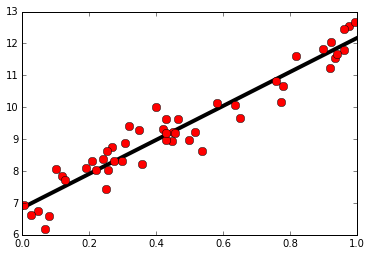

In [9]:
a, b = 5, 7 # Regression parameters

X = np.random.random(size=(50, 1))
# Linear model: Y = aX + b + eps, where eps ~ N(0, 0.5)
Y = a * X.squeeze() + b + np.random.normal(scale = 0.5, size=50) 

# fit_intercept stands for 'b' in the equation above
model = LinearRegression(fit_intercept=True) 
model.fit(X, Y)

print ("Y = %.3fX + %.3f + eps" % (model.coef_, model.intercept_))

# Plotting the data and the model prediction
X_test = np.linspace(0, 1, 100)

plt.plot(X_test.squeeze(), model.predict(X_test[:, np.newaxis]), 
         linewidth = 4, color =  'k');
plt.plot(X.squeeze(), Y, 'ro', ms = 8)
plt.show()

## Обучение без учителя (unsupervised learning)
В отличие от задач обучения с учителем, данный раздел включает в себя задачи обработки данных, в которых известны только данные $X$, а ответы $y$ (также как и множество ответов $Y$) не задаются, и требуется обнаружить внутренние взаимосвязи и зависимости, существующие между объектами.

В качестве задач в этой области обычно выделяют задачи кластеризации, снижения размерности, поиска ассоциативных правил, фильтрации выбросов и другие.

### Снижение размерности (dimensionality reduction)
Задача снижения размерности заключается в том, чтобы по исходным признакам с помощью некоторых функций преобразования перейти к наименьшему числу новых признаков, не потеряв при этом никакой существенной информации об объектах выборки. 

### Principal Component Analysis (PCA)

Одним из подходов к решению задачи снижения размерности является поиск новых признаков, являющихся линейными комбинациями исходных признаков. Один из способов реализации такого подхода - это метод главных компонент. 

Существует несколько эквивалентных математических формулировок этого метода. В рамках одной из них вычисление главных компонент сводится к вычислению собственных векторов и собственных значений ковариационной матрицы $X^TX$ исходных данных или к сингулярному разложению (SVD) самой матрицы данных $X$. 

Метод главных компонент имеет множество практических [применений](http://www.machinelearning.ru/wiki/index.php?title=%D0%9F%D1%80%D0%B8%D0%BC%D0%B5%D0%BD%D0%B5%D0%BD%D0%B8%D0%B5_%D0%BC%D0%B5%D1%82%D0%BE%D0%B4%D0%B0_%D0%B3%D0%BB%D0%B0%D0%B2%D0%BD%D1%8B%D1%85_%D0%BA%D0%BE%D0%BC%D0%BF%D0%BE%D0%BD%D0%B5%D0%BD%D1%82) помимо снижения размерности исходных данных в задачах машинного обучения. Одним из них является визуализация многомерных данных. Для этого необходимо выделить первые две главные компоненты и спроецировать исходные данных на них. Рассмотрим применение этого метода на наборе данных Wine.

Number of objects: 178 
Number of features: 13 
Number of classes: 3


C:\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


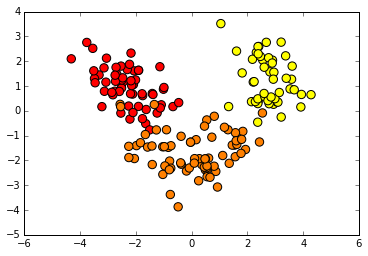

In [10]:
# Loading data
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
raw_data = urlopen(url)
data = np.loadtxt(raw_data, delimiter=",")

# Data stats
print("Number of objects:", data.shape[0], 
      "\nNumber of features:", data.shape[1] - 1,
     "\nNumber of classes:", len(np.unique(data[:, 0]))) 

X = data[:, 1:]
y = data[:, 0]

# Principal Component Analysis
# We want to visualize the data in 2D, so we need only two first principal components
pca = PCA(n_components=2)
 # Projecting scaled X onto the plane spanned by the first two principal components
X_reduced = pca.fit_transform(scale(X))

# Visualization
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c = y, s = 70, cmap='autumn')
plt.show()

In [11]:
pca.components_

array([[-0.144,  0.245,  0.002,  0.239, -0.142, -0.395, -0.423,  0.299,
        -0.313,  0.089, -0.297, -0.376, -0.287],
       [ 0.484,  0.225,  0.316, -0.011,  0.3  ,  0.065, -0.003,  0.029,
         0.039,  0.53 , -0.279, -0.164,  0.365]])

Посмотрим, какие признаки входят в полученные главные компоненты с наибольшими (по модулю) коэффициентами:

In [12]:
f1, f2 = np.argmax(np.abs(pca.components_), axis=1)
print('Feature:', f1, 'Coefficient:', pca.components_[0][f1])
print('Feature:', f2, 'Coefficient:', pca.components_[1][f2])

Feature: 6 Coefficient: -0.42293429671
Feature: 9 Coefficient: 0.52999567207


Это признаки Total phenols(6) и Proanthocyanins(9). Спроецируем исходнные данные на них: 

C:\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


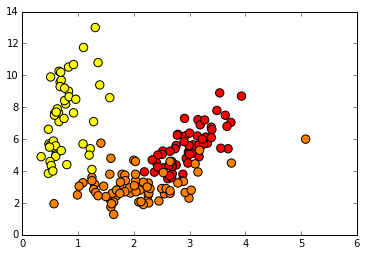

In [13]:
plt.scatter(X[:, 6], X[:, 9], c = y, s = 70, cmap='autumn')
plt.show()

Видно, что в проекции на эти два признака отчётливо выделяются кластеры, формируемые различными классами. Таким образом, с помощью PCA мы нашли пару исходных признаков, которые достаточно хорошо описывают разделение исходной выборки на классы. 

### Кластеризация (clustering)

Задача кластеризации состоит в разбиении исходной выборки объектов на непересекающиеся подмножества, называемые кластерами, так, чтобы каждый кластер состоял из схожих объектов, а объекты разных кластеров существенно отличались. Входными данными для такой задачи обычно является либо сама выборка (т.е. набор описаний объектов), либо матрица попарных расстояний между объектами выборки. Одним из ключевых моментов в кластеризации является выбор подходящей меры схожести объектов.

Обычно выделяют следующие алгоритмы кластеризации:

- Иерархические 
- Спектральные
- Графовые
- Статистические
- ...

### Метод k-means
В качестве примера рассмотрим метод k-средних. Метод заключается в построении k центров кластеров (центроидов) так, чтобы минимизировать суммарное квадратичное отклонение точек кластеров от центров этих кластеров.

C:\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


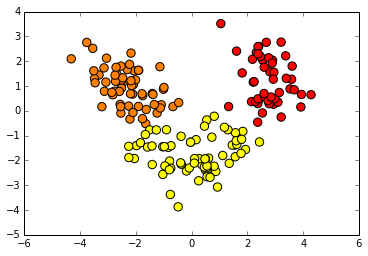

In [14]:
k_means = KMeans(n_clusters = 3)
y = k_means.fit_predict(X_reduced)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c = y, s = 70, cmap='autumn')
plt.show()

### Спектральная кластеризация

Методы кластеризации данного типа используют спектр (собственные значения) матрицы схожести объектов выборки для снижения размерности, после чего в полученном пространстве более низкой размерности проводится обычная кластеризация.

C:\Anaconda3\lib\site-packages\sklearn\manifold\spectral_embedding_.py:215: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
C:\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


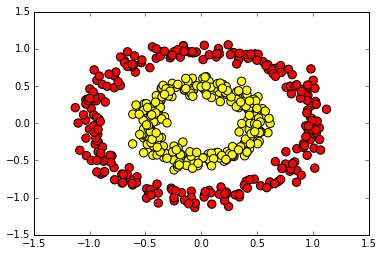

In [15]:
circles = make_circles(n_samples = 500, factor = 0.5, noise = 0.07)[0]
spectral = SpectralClustering(n_clusters = 2, 
                              affinity = "nearest_neighbors")
spectral.fit(circles)

plt.scatter(circles[:, 0], circles[:, 1], c = spectral.labels_, s = 70, cmap='autumn')
plt.show()

## Ссылки:

- [SVM](http://www.machinelearning.ru/wiki/index.php?title=SVM)
- [Регрессионный анализ](https://en.wikipedia.org/wiki/Regression_analysis)
- [PCA](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%B3%D0%BB%D0%B0%D0%B2%D0%BD%D1%8B%D1%85_%D0%BA%D0%BE%D0%BC%D0%BF%D0%BE%D0%BD%D0%B5%D0%BD%D1%82)
- [Кластерный анализ](https://en.wikipedia.org/wiki/Cluster_analysis)